#### XGBoost

In [5]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer, fetch_california_housing, load_diabetes
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import plot_importance, plot_tree
import numpy as np

import graphviz
import matplotlib.pyplot as plt

In [6]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, test_size=0.3, random_state=123
)

cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]], shape=(569, 30)),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,

In [7]:
dmtrain = xgb.DMatrix(data=X_train, label=y_train)
dmtest = xgb.DMatrix(data=X_test, label=y_test)

In [8]:
params = {
    'max_depth' : 3,
    'eta' : 0.15,
    'objective' : 'binary:logistic',
    'eval_metric' : 'error'
}
# params = {
#     'max_depth' : 3,
#     'eta' : 0.15,
#     'objective' : 'reg:linear',
#     'eval_metric' : 'error'
# }
# params = {
#     'max_depth': 3,
#     'eta': 0.15,
#     'objective': 'reg:squarederror',  # 권장 objective
#     'eval_metric': 'rmse'
# }

# params = {
#     'max_depth' : 3,
#     'eta' : 0.15,
#     'objective' : 'multi:softmax',
#     'num_class' : 3,
#     'eval_metric' : 'error'
# }
# params = {
#     'max_depth' : 3,
#     'eta' : 0.15,
#     'objective' : 'multi:softprob',
#     'num_class' : 3,
#     'eval_metric' : 'error'
# }

num_rounds = 500

In [9]:
evals = [(dmtrain, 'train'), (dmtest, 'test')]
xgb_model = xgb.train(
    params = params,
    dtrain = dmtrain,
    num_boost_round=num_rounds,
    early_stopping_rounds=20,
    evals=evals
)

[0]	train-error:0.36181	test-error:0.39766
[1]	train-error:0.06784	test-error:0.08187
[2]	train-error:0.02513	test-error:0.04678
[3]	train-error:0.01508	test-error:0.04678
[4]	train-error:0.01759	test-error:0.04678
[5]	train-error:0.01759	test-error:0.04094
[6]	train-error:0.01759	test-error:0.04094
[7]	train-error:0.01005	test-error:0.04094
[8]	train-error:0.01005	test-error:0.04094
[9]	train-error:0.01508	test-error:0.04094
[10]	train-error:0.01005	test-error:0.04094
[11]	train-error:0.00754	test-error:0.03509
[12]	train-error:0.00754	test-error:0.04094
[13]	train-error:0.00754	test-error:0.03509
[14]	train-error:0.00754	test-error:0.02339
[15]	train-error:0.00754	test-error:0.02339
[16]	train-error:0.00754	test-error:0.02339
[17]	train-error:0.00754	test-error:0.02924
[18]	train-error:0.00754	test-error:0.02339
[19]	train-error:0.00754	test-error:0.02924
[20]	train-error:0.00754	test-error:0.02924
[21]	train-error:0.00754	test-error:0.02339
[22]	train-error:0.00754	test-error:0.0233

In [10]:
predict_probability = xgb_model.predict(dmtest)
print(np.round(predict_probability[:10],3))

[0.996 0.994 0.012 0.981 0.007 0.896 0.963 0.987 0.798 0.893]


In [11]:
predict_integer = [1 if p > 0.5 else 0 for p in predict_probability]
print(predict_integer[:10])

[1, 1, 0, 1, 0, 1, 1, 1, 1, 1]


In [12]:
print(f"ACC : {accuracy_score(y_test, predict_integer)}")
print(f'precision : {precision_score(y_test, predict_integer)}')
print(f"Recall : {recall_score(y_test, predict_integer)}")

ACC : 0.9766081871345029
precision : 0.9805825242718447
Recall : 0.9805825242718447


In [13]:
import pandas as pd

features = cancer.data
label = cancer.target

cancer_df = pd.DataFrame(data=features, columns=cancer.feature_names)
cancer_df['target'] = label
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [14]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

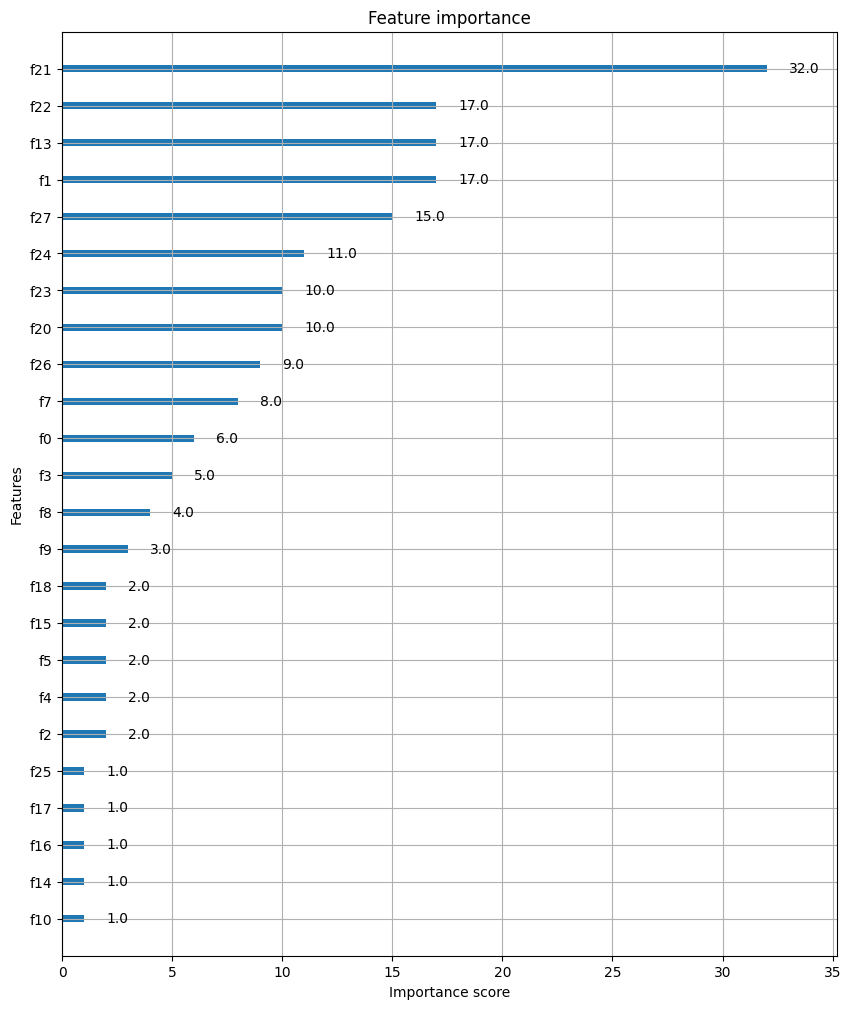

In [15]:
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax)

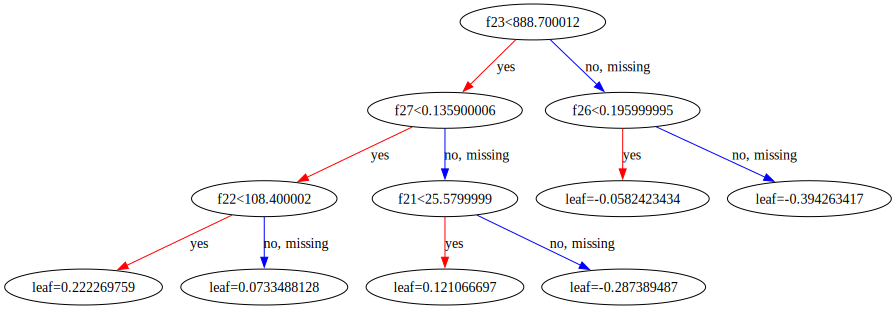

In [16]:
xgb.to_graphviz(xgb_model)

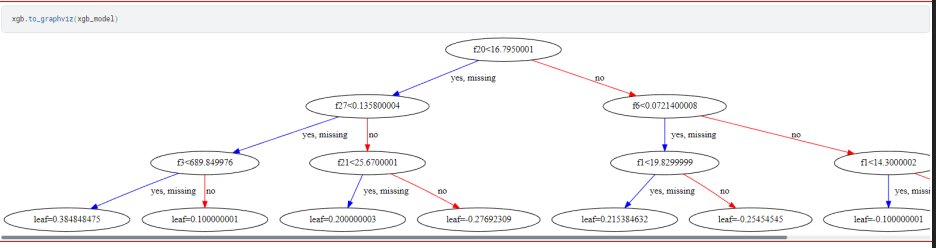

c:\Users\main\miniconda3\envs\ml\Lib\site-packages\xgboost\plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


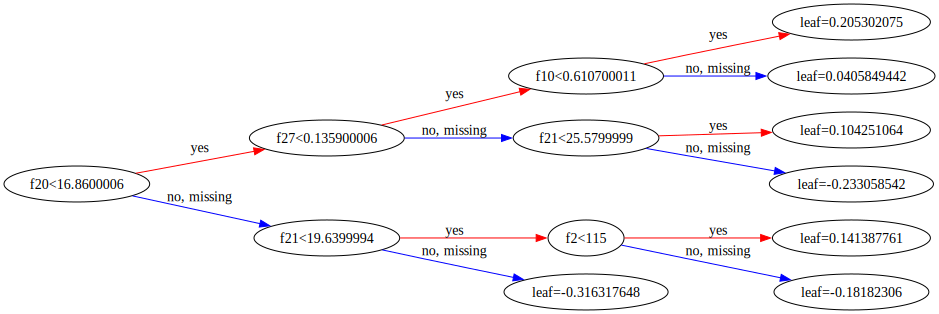

In [17]:
xgb.to_graphviz(xgb_model, num_trees=1, rankdir='LR', size='15,15')

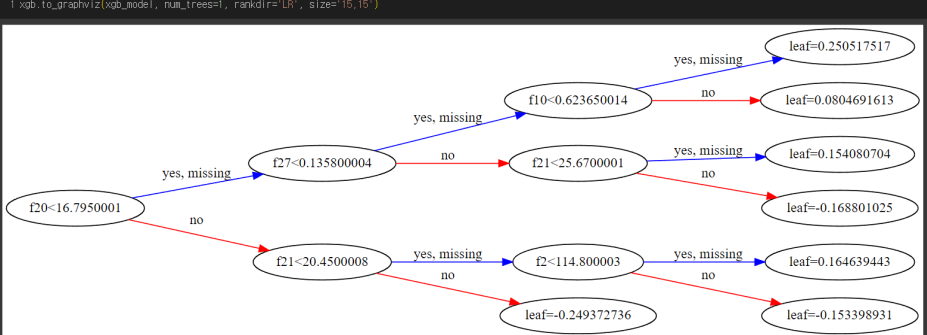

xgb 사용하려면 설치파일도 다운받고 환경변수 잡아야된다고 함.

https://graphviz.org/download/